# HomeWork 1- 17350796

It includes Date of Sale, Price and Address of all residential properties purchased in Ireland since the 1st January 2010, 
as declared to the Revenue Commissioners for stamp duty purposes
csv file = ppr-17350796.csv

## Part 1: Preparing the data from CSV



In [103]:
import pandas as pd

from pandas.plotting import table
# import dataframe_image as dfi

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages


from scipy import stats
#for cat plots
import seaborn as sns



Reading in the data and displaying the first 5 rows:


In [3]:
df = pd.read_csv('ppr-17350796.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)


## First 5 rows

In [4]:
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,06/05/2016,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,"€630,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,22/12/2014,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,"€281,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,22/05/2020,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,"€560,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,27/11/2014,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,"€46,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,22/11/2018,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,"€204,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


## Last 5 rows

Displaying the last 5 rows

In [5]:
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9995,15/12/2017,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,"€200,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9996,18/12/2012,"17 the court, cypress downs, templeogue",NaN,Dublin,"€605,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9997,14/12/2016,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,"€46,666.67",No,No,Second-Hand Dwelling house /Apartment,NaN
9998,19/06/2017,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,"€176,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9999,02/11/2017,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,"€86,738.06",Yes,No,Second-Hand Dwelling house /Apartment,NaN


#### Shape of data frame

Display number of rows and columns- 10000 = Rows, 9 = columns

In [6]:
# number of rows and columns
df.shape

(10000, 9)

The data is currently all read as type object. The data needs to be change to the appropriate data type for it to be accurately analysed

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date of Sale (dd/mm/yyyy)  10000 non-null  object
 1   Address                    10000 non-null  object
 2   Postal Code                1860 non-null   object
 3   County                     10000 non-null  object
 4   Price (€)                  10000 non-null  object
 5   Not Full Market Price      10000 non-null  object
 6   VAT Exclusive              10000 non-null  object
 7   Description of Property    10000 non-null  object
 8   Property Size Description  1029 non-null   object
dtypes: object(9)
memory usage: 703.2+ KB


Looking at the column names for errrors 

In [8]:
df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'Postal Code', 'County',
       'Price (€)', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [9]:
# Converting price to float, you need to remove all symbols from strings for the command to work. 



df['Price (€)'] = df['Price (€)'].str.replace(',', '')


df['Price (€)'] = df['Price (€)'].str.replace('€', '')

df['Price (€)'] = df['Price (€)'].astype(float)

df[['Price (€)']]

,Price (€)
0,630000.00
1,281000.00
2,560000.00
3,46000.00
4,204000.00
...,...
9995,200000.00
9996,605000.00
9997,46666.67
9998,176000.00


These object features have been changed to categorical as they each describe unique values

In [10]:

# There are a set number of unique counties
df['County'] = df['County'].astype('category')

# There are a set number of unique descriptions

df['Description of Property'] = df['Description of Property'].astype('category')

df['Address'] = df['Address'].astype('category')


# Postal code has a set number of unique categories
df['Postal Code'] = df['Postal Code'].astype('category')

# There are a set number of property size descriptions
df['Property Size Description'] = df['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')






df.dtypes

Date of Sale (dd/mm/yyyy)      object
Address                      category
Postal Code                  category
County                       category
Price (€)                     float64
Not Full Market Price        category
VAT Exclusive                category
Description of Property      category
Property Size Description    category
dtype: object

In [11]:
# converting dates to date data type
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'])

df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
dtype: object

In [12]:
df['Year'] = pd.DatetimeIndex(df['Date of Sale (dd/mm/yyyy)']).year
df['Month'] = pd.DatetimeIndex(df['Date of Sale (dd/mm/yyyy)']).month

df.head(10)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,6
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2014,12
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2020,5
3,2014-11-27,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2014,11
4,2018-11-22,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2018,11
5,2016-01-31,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,1
6,2021-11-30,"10 HOLLOW WAY, OAKVIEW VILLAGE, TRALEE",NaN,Kerry,182000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2021,11
7,2016-02-05,"Ballygibbon, Nenagh",NaN,Tipperary,264317.0,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,2016,2
8,2018-12-03,"RANDLESTOWN, BALLYCOGLEY, WEXFORD",NaN,Wexford,70000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2018,12
9,2015-11-17,"3 RIVER STREET, CLARA, CO OFFALY",NaN,Offaly,34500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,11


In [13]:
df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
Year                                  int64
Month                                 int64
dtype: object

Looking for duplicate rows and columns

In [14]:
# There is 20 non unique addresses 
df.nunique()

Date of Sale (dd/mm/yyyy)    2759
Address                      9980
Postal Code                    22
County                         26
Price (€)                    2285
Not Full Market Price           2
VAT Exclusive                   2
Description of Property         3
Property Size Description       4
Year                           13
Month                          12
dtype: int64

In [15]:
df.isnull().sum()

Date of Sale (dd/mm/yyyy)       0
Address                         0
Postal Code                  8140
County                          0
Price (€)                       0
Not Full Market Price           0
VAT Exclusive                   0
Description of Property         0
Property Size Description    8971
Year                            0
Month                           0
dtype: int64

In [16]:
df['Not Full Market Price'].value_counts(dropna=False)

No     9552
Yes     448
Name: Not Full Market Price, dtype: int64

## Postal Codes Review

The county Dublin appears 3193 times, this is the highest proportion. 

In [17]:
df.loc[df['County'].isin(['Dublin'])]

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,6
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2014,12
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2020,5
5,2016-01-31,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,1
10,2015-06-15,"Apt 350 Block 8B, Tallaght Cross West, Dublin 24",Dublin 24,Dublin,99433.75,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2015,6
...,...,...,...,...,...,...,...,...,...,...,...
9975,2013-04-11,"29 Carndonagh Drive, Donaghmede, Dublin 13",Dublin 13,Dublin,190000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2013,4
9988,2020-10-03,"44 GERALDSTOWN WOODS, SANTRY AVE, DUBLIN 9",Dublin 9,Dublin,170000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2020,10
9993,2019-05-12,"6 Edenbrook Green, Edenbrook, Citywest",NaN,Dublin,348017.61,No,Yes,New Dwelling house /Apartment,NaN,2019,5
9996,2012-12-18,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2012,12


In [18]:
df["Postal Code"].describe().T

count          1860
unique           22
top       Dublin 15
freq            232
Name: Postal Code, dtype: object

58% percent have a set post code, while this is low. I have opted to keep the data as it still could provide relevent statisical inferences

There is some logical integrity issues with the data. Some post codes do not match the post codes in their addresses. NaN needs to be converted to not relevent. 

In [19]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,Address,Postal Code,County,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
1,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
2,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
3,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,No,No,Second-Hand Dwelling house /Apartment,NaN
4,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,No,No,Second-Hand Dwelling house /Apartment,NaN


I have decided to change the NaN values of 'Postal Code' to 'No Post Code' 

In [20]:
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
9995,2017-12-15,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2017,12
9996,2012-12-18,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2012,12
9997,2016-12-14,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,12
9998,2017-06-19,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2017,6
9999,2017-02-11,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,86738.06,Yes,No,Second-Hand Dwelling house /Apartment,NaN,2017,2


### Looking at all the unique categories and their values:

In [21]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64

Postal Code
NaN          8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77

## Description of Property Iregularity 

'Description of Property' shows 3 unique properties. "Teach/Árasán Cónaithe Atháimhe" is the Irish translation of "Second-Hand Dwelling house /Apartment". While it is important that Irish people practice their native language for the purpose of data analytics it makes sense to change this to the english category for consistency. 

In [22]:
# getting index of where the illogical data is 
df.index[df['Description of Property'] == 'Teach/Árasán Cónaithe Atháimhe'].tolist()

[5686]

In [23]:
# replacing with english translation
df.at[5686,'Description of Property']='Second-Hand Dwelling house /Apartment'


In [24]:
# dropping the value
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Atháimhe','Second-Hand Dwelling house /Apartment')

In [25]:
df['Description of Property'].value_counts(dropna=False)

Second-Hand Dwelling house /Apartment    8364
New Dwelling house /Apartment            1636
Name: Description of Property, dtype: int64

In [26]:
df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2
Postal Code,1860,22,Dublin 15,232
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364
Property Size Description,1029,4,greater than or equal to 38 sq metres and less...,723


# Describing Numeric Types

In [27]:
numeric_columns = df.select_dtypes(['float64','int']).columns
numeric_columns

Index(['Price (€)'], dtype='object')

In [28]:
df.describe(datetime_is_numeric=True).T



,count,mean,min,25%,50%,75%,max,std
Date of Sale (dd/mm/yyyy),10000,2017-01-19 02:06:08.640000,2010-01-02 00:00:00,2014-11-07 00:00:00,2017-06-02 12:00:00,2019-08-04 00:00:00,2022-12-01 00:00:00,NaN
Price (€),10000.0,260260.702676,5500.0,120000.0,200000.0,308370.08,17151248.0,390170.322939
Year,10000.0,2016.5192,2010.0,2014.0,2017.0,2019.0,2022.0,3.108729
Month,10000.0,6.8947,1.0,4.0,7.0,10.0,12.0,3.477186


In [29]:
# numeric_DataDescription_Table = df.describe(datetime_is_numeric=True).T

# # plot = plt.subplot(111, frame_on=False)

# # #     #remove axis
# # # plot.xaxis.set_visible(False) 
# # # plot.yaxis.set_visible(False) 

# # #create the table plot and position it in the upper left corner
# # table(plot, numeric_DataDescription_Table,loc='upper right')

# #save the plot as a png file
# plt.savefig('numericDataDescribed.png')

#### Summary stats for numeric data Price (€)
From look at the price data, the standard deviation is very large, with a large range of values. Range = 17145748

In [30]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),10000.0,260260.702676,390170.322939,5500.0,120000.0,200000.0,308370.08,17151248.0


### Median value of price

In [31]:
df['Price (€)'].median()


200000.0

In [32]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
Price (€),2285


In [33]:
df['Address'].describe()

count                                                 10000
unique                                                 9980
top       APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...
freq                                                      2
Name: Address, dtype: object

In [34]:
df.to_csv('updated-ppr-17350796.csv', index=False)

In [35]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64

Postal Code
NaN          8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77

In [36]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    0.0002
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       0.0002
GURETTI, HOWTH SUMMIT, NEW RD                            0.0002
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      0.0002
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        0.0002
                                                          ...  
29 Crockaun Way, Brownstown, Curragh                     0.0001
29 DROIMNEACH, BWEENG, CORK                              0.0001
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    0.0001
29 DUBLIN ST, DUNDALK, CO LOUTH                          0.0001
unit 3 Parkside Glen, parkside, malahide road            0.0001
Name: Address, Length: 9980, dtype: float64

Postal Code
NaN          0.8140
Dublin 15    0.0232
Dublin 18    0.0143
Dublin 9     0.0119
Dublin 8     0.0115
Dublin 24    0.0114
Dublin 4     0.0109
Dublin 12    0.0104
Dublin 16    0.0096
Dublin 11    0.0093
Dublin 7     0.0088
Dublin 13 

In [37]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=True))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    0.0002
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       0.0002
GURETTI, HOWTH SUMMIT, NEW RD                            0.0002
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      0.0002
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        0.0002
                                                          ...  
29 Crockaun Way, Brownstown, Curragh                     0.0001
29 DROIMNEACH, BWEENG, CORK                              0.0001
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    0.0001
29 DUBLIN ST, DUNDALK, CO LOUTH                          0.0001
unit 3 Parkside Glen, parkside, malahide road            0.0001
Name: Address, Length: 9980, dtype: float64

Postal Code
Dublin 15    0.124731
Dublin 18    0.076882
Dublin 9     0.063978
Dublin 8     0.061828
Dublin 24    0.061290
Dublin 4     0.058602
Dublin 12    0.055914
Dublin 16    0.051613
Dublin 11    0.050000
Dublin 7     0.047312
Dublin 13 

### Looking for duplicates

In [38]:
df.duplicated().sum()

0

In [39]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


## Describing categorical data

In [40]:
df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2
Postal Code,1860,22,Dublin 15,232
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364
Property Size Description,1029,4,greater than or equal to 38 sq metres and less...,723


In [41]:
df_category_mode = pd.DataFrame(index = df[category_columns].describe().T.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Address,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,NaN,NaN,NaN,NaN,NaN,NaN
County,NaN,NaN,NaN,NaN,NaN,NaN
Not Full Market Price,NaN,NaN,NaN,NaN,NaN,NaN
VAT Exclusive,NaN,NaN,NaN,NaN,NaN,NaN
Description of Property,NaN,NaN,NaN,NaN,NaN,NaN
Property Size Description,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64
CategoricalIndex(['APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE',
                  '8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY',
                  'GURETTI, HOWTH SUMMIT, NEW RD',
                  '3 BARTRA ROCK, HARBOUR ROAD, DALKEY',
                  'BALLYHAUNIS RD, CLAREMORRI

In [43]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Address,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,0.0002,"8A COACHMAN APARTMENTS, DOMINICK STREET, CO GA...",2,0.0002
Postal Code,Dublin 15,232,0.124731,Dublin 18,143,0.076882
County,Dublin,3193,0.3193,Cork,1099,0.1099
Not Full Market Price,No,9552,0.9552,Yes,448,0.0448
VAT Exclusive,No,8399,0.8399,Yes,1601,0.1601
Description of Property,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636
Property Size Description,greater than or equal to 38 sq metres and less...,723,0.702624,greater than 125 sq metres,135,0.131195


In [44]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
Address,0.00
Postal Code,81.40
County,0.00
Not Full Market Price,0.00
VAT Exclusive,0.00
Description of Property,0.00
Property Size Description,89.71


In [45]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df[category_columns].describe().T, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,0.0002,"8A COACHMAN APARTMENTS, DOMINICK STREET, CO GA...",2,0.0002,0.00
Postal Code,1860,22,Dublin 15,232,Dublin 15,232,0.124731,Dublin 18,143,0.076882,81.40
County,10000,26,Dublin,3193,Dublin,3193,0.3193,Cork,1099,0.1099,0.00
Not Full Market Price,10000,2,No,9552,No,9552,0.9552,Yes,448,0.0448,0.00
VAT Exclusive,10000,2,No,8399,No,8399,0.8399,Yes,1601,0.1601,0.00
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636,0.00
Property Size Description,1029,4,greater than or equal to 38 sq metres and less...,723,greater than or equal to 38 sq metres and less...,723,0.702624,greater than 125 sq metres,135,0.131195,89.71


# Visualisation- Data Quality Report

### Price feature

array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

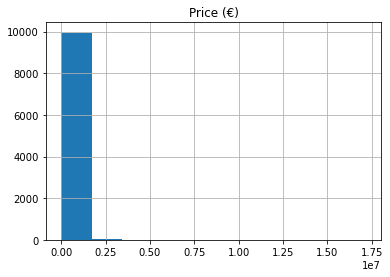

In [46]:
df[numeric_columns].hist()

array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

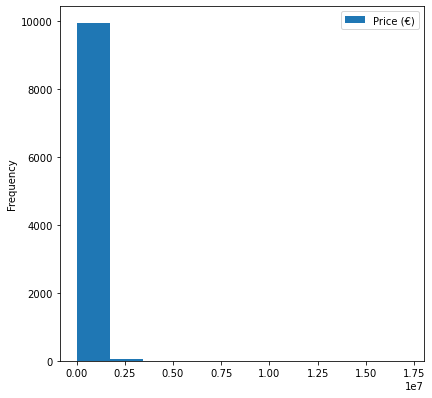

In [47]:
df[numeric_columns].plot(kind='hist', subplots=True, figsize=(30,30), layout=(4,4), sharex=False, sharey=False)


### It is clear from the looking at these histograms of price that there is a large range of values, that is heavily right skewed

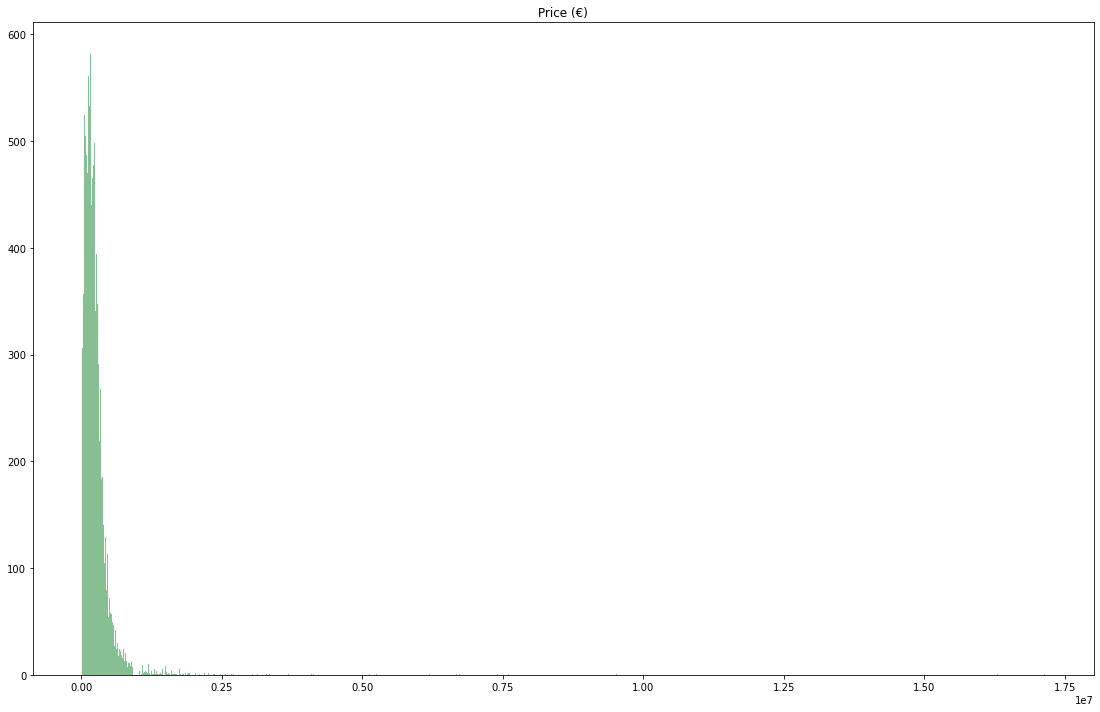

In [48]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)
plt.savefig('Homework1-DataQualityReport-NumericFeatures-histograms_all_1-1.pdf')


Box Plot of Price

From the box plot you can see there is a significant number of outliers

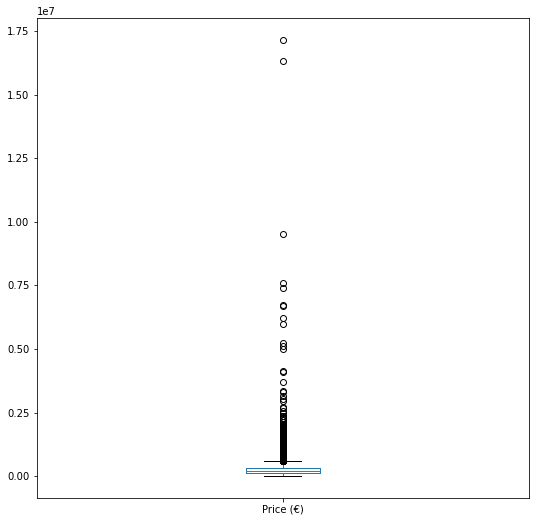

In [49]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)
plt.savefig('HomeWork-DataQualityReport-NumericFeatures-boxplots_all_1-1.pdf')

<AxesSubplot:>

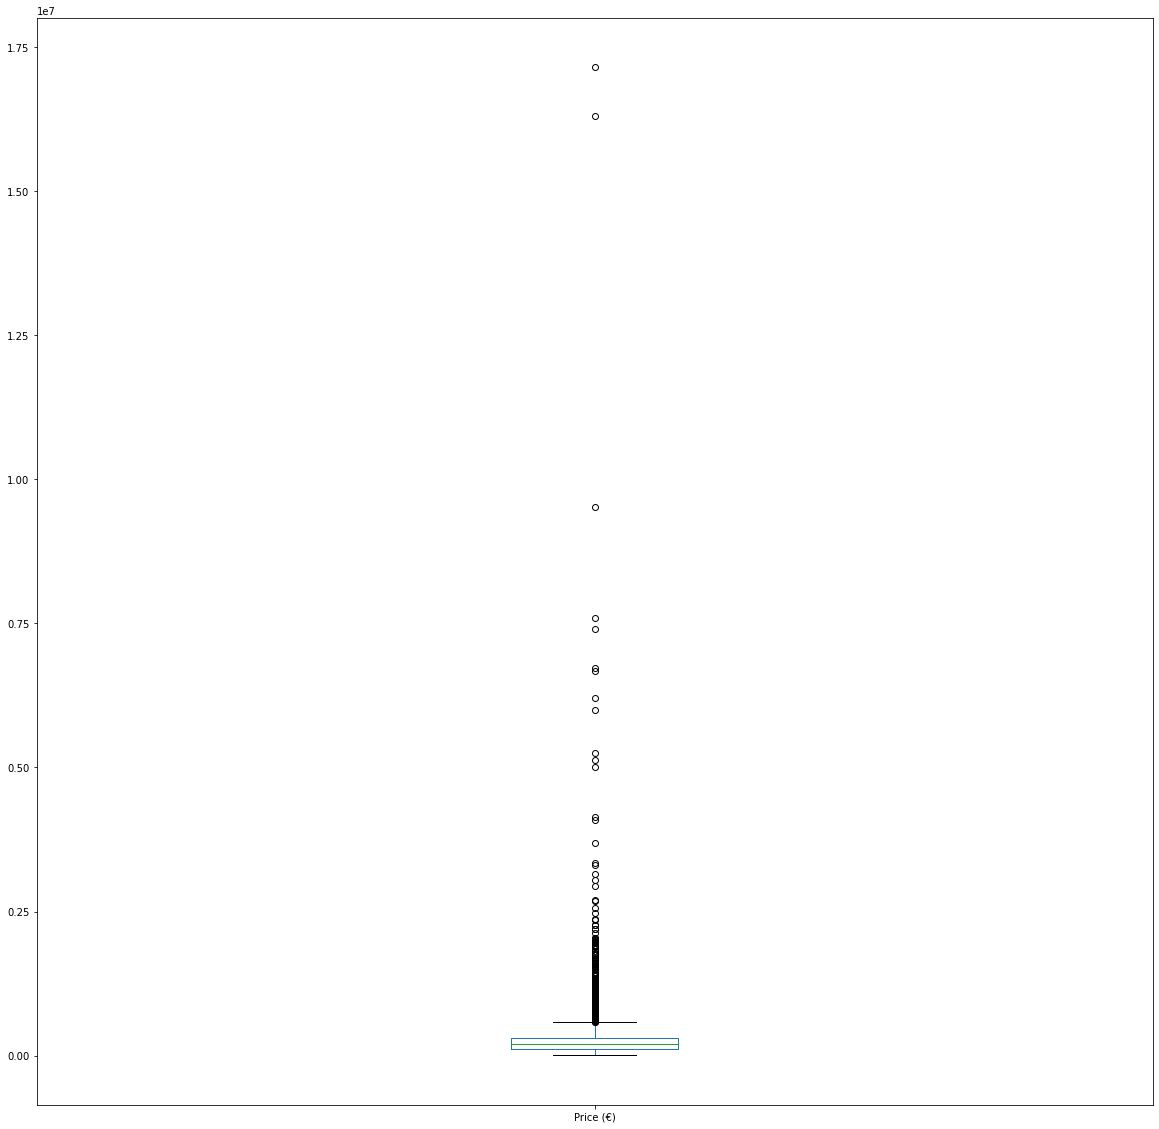

In [50]:
df.boxplot(column =['Price (€)'], grid = False, figsize=(20,20))

### Date of Sale feature 

<AxesSubplot:>

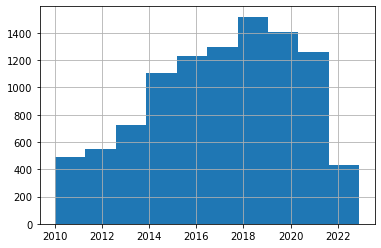

In [51]:
df['Date of Sale (dd/mm/yyyy)'].hist()

<AxesSubplot:>

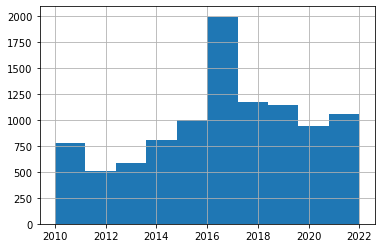

In [52]:
df['Year'].hist()

<AxesSubplot:>

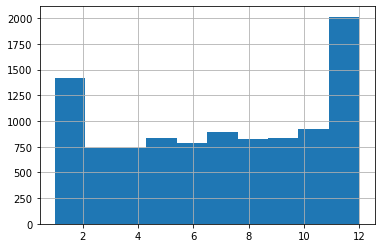

In [53]:
df['Month'].hist()

### Bar Charts for All Catergotical Features

In [54]:
# Plot bar charts for all categorical features and save them in a single PDF file
# pp = PdfPages('Homework1-DataQualityReport-CategoricalFeatures_barcharts_1-1.pdf')

# # We can set the parameters for .value_counts() to not drop the na. This allows us to see missing data in our 
# # # categorical features.
# for column in category_columns:
#     f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(5,5))
#     pp.savefig(f.get_figure())
#     plt.show()

# pp.close()

## Part 2: data quality plan for the cleaned CSV file

### List of data quality issues and proposed solutions

Date of Sale (dd/mm/yyyy): This data was converted to datetime. I will extract the months and the years in order to compare them to other features. 

Postal Code:Large proportion missing. Opted to keep as could provide further geographical information about Dublin

Price: Large variance in data makes it difficult for interpretation. There is potential to remove outliers

Description of Property: Irish descriptions were tranlated so there were only two unique values for consistency.

Property Size Description: This feature has a large amount of missing data. 

Vat Exclusive: Less than 17% of the sales do not include the VAT in the sale price. I have chose not sepated this data and keep it as one. 


### Addressing 'Property Size Desciption' feature:

In [55]:
df["Property Size Description"].describe().T

count                                                  1029
unique                                                    4
top       greater than or equal to 38 sq metres and less...
freq                                                    723
Name: Property Size Description, dtype: object

In [56]:
df['Property Size Description'].unique()

[NaN, 'greater than 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'greater than or equal to 125 sq metres', 'less than 38 sq metres']
Categories (4, object): ['greater than 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'greater than or equal to 125 sq metres', 'less than 38 sq metres']

In [57]:
df['Property Size Description'].value_counts()

greater than or equal to 38 sq metres and less than 125 sq metres    723
greater than 125 sq metres                                           135
greater than or equal to 125 sq metres                                94
less than 38 sq metres                                                77
Name: Property Size Description, dtype: int64

In [58]:
df['Property Size Description'].isnull().sum()

8971

In [59]:
df.groupby('Description of Property')['Property Size Description'].count()

Description of Property
New Dwelling house /Apartment            1029
Second-Hand Dwelling house /Apartment       0
Name: Property Size Description, dtype: int64

As you can see 90% of the data is missing. However, as is shown 62% of New Dwelling house/Apartments have a Property Size Description attrtibuted to them. Thus, it may be valuable information to help look at the target feature Price later on. 

In [60]:
df.loc[(df['Description of Property'] == 'New Dwelling house /Apartment') & 
                         (df['Property Size Description'].isna())]

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
15,2021-03-06,"4 INISHFALLEN, ROOKERY ROAD, KILLARNEY",NaN,Kerry,340000.00,No,Yes,New Dwelling house /Apartment,NaN,2021,3
32,2020-09-12,"4 Forgelands, Old Forge Road, Enniscorthy",NaN,Wexford,190390.31,No,Yes,New Dwelling house /Apartment,NaN,2020,9
49,2021-08-17,"4 An Gairdin Cuil, Cosmona, Loughrea",NaN,Galway,265000.00,No,Yes,New Dwelling house /Apartment,NaN,2021,8
52,2021-11-29,"18 Strand View, Strand Road, Bray",NaN,Wicklow,431718.00,No,Yes,New Dwelling house /Apartment,NaN,2021,11
63,2019-11-27,"14 Meadowgate, Marlton Road",NaN,Wicklow,297797.36,No,Yes,New Dwelling house /Apartment,NaN,2019,11
...,...,...,...,...,...,...,...,...,...,...,...
9942,2019-03-05,"96 Cnoc Tiarnach, Grange End, Dunshaughlin",NaN,Meath,295154.00,No,Yes,New Dwelling house /Apartment,NaN,2019,3
9959,2019-11-14,"Pulla, Gorteen, Ring",NaN,Waterford,150000.00,No,Yes,New Dwelling house /Apartment,NaN,2019,11
9966,2021-09-30,"Apartment 14, First Floor - Block B, Belvoir",NaN,Dublin,476678.00,No,No,New Dwelling house /Apartment,NaN,2021,9
9983,2021-06-30,"Knockmore, Drinagh",NaN,Cork,233000.00,No,Yes,New Dwelling house /Apartment,NaN,2021,6


In [61]:
df.groupby('Description of Property').count()

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Property Size Description,Year,Month
Description of Property,,,,,,,,,,
New Dwelling house /Apartment,1636,1636,211,1636,1636,1636,1636,1029,1636,1636
Second-Hand Dwelling house /Apartment,8364,8364,1649,8364,8364,8364,8364,0,8364,8364


### Addressing the 'VAT exclusive' data

In [62]:
df.loc[df['Description of Property'] == 'New Dwelling house /Apartment']

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
7,2016-02-05,"Ballygibbon, Nenagh",NaN,Tipperary,264317.00,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,2016,2
10,2015-06-15,"Apt 350 Block 8B, Tallaght Cross West, Dublin 24",Dublin 24,Dublin,99433.75,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2015,6
15,2021-03-06,"4 INISHFALLEN, ROOKERY ROAD, KILLARNEY",NaN,Kerry,340000.00,No,Yes,New Dwelling house /Apartment,NaN,2021,3
20,2017-07-04,"Knockanna, Tinahely",NaN,Wicklow,105000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 125 sq metres,2017,7
24,2010-07-09,"30 Broadfield Drive, Broadfield Manor, Rathcoole",NaN,Dublin,281938.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,7
...,...,...,...,...,...,...,...,...,...,...,...
9967,2018-03-08,"152 BEECHDALE, DUNBOYNE, MEATH",NaN,Meath,330000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2018,3
9979,2010-03-11,"3 Holywell Grove, Kilcoole",NaN,Wicklow,233480.17,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,3
9983,2021-06-30,"Knockmore, Drinagh",NaN,Cork,233000.00,No,Yes,New Dwelling house /Apartment,NaN,2021,6
9991,2018-11-19,"14 Roseberry Hill, Quinagh, CARLOW",NaN,Carlow,173173.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2018,11


In [63]:
print("number of 'Yes VAT exclusives: '",(df['VAT Exclusive'] == 'Yes').sum())
print("number of New Dwelling house/Apartment '",(df['Description of Property'] == 'New Dwelling house /Apartment').sum())

number of 'Yes VAT exclusives: ' 1601
number of New Dwelling house/Apartment ' 1636


In [64]:
df.loc[(df['Description of Property'] == 'New Dwelling house /Apartment') & (df['VAT Exclusive'] == 'No')]

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
199,2017-08-05,"Unit 271 Roseberry Hill, Newbridge",NaN,Kildare,235000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2017,8
479,2016-08-23,"33 Shannon Quays, Rooskey",NaN,Leitrim,132159.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2016,8
738,2014-08-09,"Woodbine Heights, Spanish Point",NaN,Clare,48242.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2014,8
822,2016-12-23,"4 The Parade, Riverchapel Wood, Riverchapel C...",NaN,Wexford,130000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2016,12
1004,2011-06-10,"57 Glen Tain, Carnamuggagh, Letterkenny",NaN,Donegal,90000.00,Yes,No,New Dwelling house /Apartment,less than 38 sq metres,2011,6
1382,2012-08-22,"8 Cois Abhann, Excise Street/Lyster Street, At...",NaN,Westmeath,125000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2012,8
1389,2013-04-07,"Far Finisklin, Sligo",NaN,Sligo,48000.00,Yes,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2013,4
1704,2010-01-27,"no 8 emmet place, nenagh",NaN,Tipperary,140000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2010,1
2458,2018-11-14,"2 THE GRAINSTORE, BAGENALSTOWN, CARLOW",NaN,Carlow,107825.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2018,11
2744,2015-06-11,"50 Abhainn glas, Edgeworthstown",NaN,Longford,35000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,2015,6


Only 35 "New Dwelling house/Apartment" are marked as 'No' for Vat Exclusive. The other 1601 are marked as 'Yes'. This is in line with the information for the revenue regarding VAT payments on new property. New properties that meet certain conditions must pay VAT at a rate of 13.5%- https://www.revenue.ie/en/property/stamp-duty/consideration/vat-exclusive-consideration.aspx#:~:text=If%20you%20buy%20or%20lease,on%20the%20VAT%2Dexclusive%20amount.
This does not apply to second hand property which we can see in the data:

In [65]:
print("number of 'No' VAT exclusives: '",(df['VAT Exclusive'] == 'No').sum())


number of 'No' VAT exclusives: ' 8399


For this there is no reason to extract or remove any of the Vat Exclusive data as there are differences only for a very small amount of data and the difference may only be 13.5%

### Looking at the outliers of the price data 

As you can see there is a large range of values for the target feature of price. 

In [66]:
print(df['Price (€)'].mean(), "mean of price data")
print(df['Price (€)'].std(), "standard deviation of price data")

260260.70267600025 mean of price data
390170.3229389402 standard deviation of price data


There are some sales that were very high in price. These are explored in more detail later:

In [67]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)

,Price (€)
4518,17151248.00
7913,16308370.05
7698,9515419.00
915,7600000.00
6404,7405286.34
3167,6720000.00
3999,6680000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00


As you can see some values for sales are extremely low like €5500. Having looked into these sales, some are that low because they are ruins that were bought 9 years ago. It is difficult to determine if they were input mistakes or genunine mistakes. Due to this uncertainty I have decided to keep these outliers. 

In [68]:
df.sort_values(by='Price (€)', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)

,Price (€)
2094,5500.0
8321,5500.0
4708,6000.0
2661,6348.0
2772,6608.0
2950,7250.0
2582,7300.0
2846,7500.0
5542,7500.0
2749,7500.0


In [69]:
df.loc[df['Price (€)'] <= 10000]

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
624,2018-05-29,"617 HOWTH ROAD, RAHENY, DUBLIN 5",Dublin 5,Dublin,10000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2018,5
849,2014-08-20,"Glensharrold, Carrickerry",NaN,Limerick,8000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2014,8
1276,2017-11-09,"226 CASTLE CURRAGH HEATH, DUBLIN 15, DUBLIN",Dublin 15,Dublin,8697.91,No,No,Second-Hand Dwelling house /Apartment,NaN,2017,11
1320,2016-04-13,"RAEMORE, KIELDUFF, CO KERRY",NaN,Kerry,10000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,4
1480,2015-09-22,"20 MILLWHARF APARTMENTS, MERCHANTS QUAY, DROGHEDA",NaN,Louth,9039.78,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,9
1580,2010-03-12,"MAIN STREET, KILTEALY",NaN,Wexford,10000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2010,3
2094,2015-12-14,"19 Aranleigh Mount, Rathfarnham, Dublin 14",Dublin 14,Dublin,5500.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,12
2267,2015-10-06,"APT 35 BUCKINGHAM VILLAGE, DUBLIN 1, DUBLIN",Dublin 1,Dublin,10000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2015,10
2582,2019-02-04,"74 SPRING LANE RD, BALLYVOLANE, CORK",NaN,Cork,7300.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2019,2
2661,2013-10-14,"Friarsquarter, Ballinrobe",NaN,Mayo,6348.00,No,No,Second-Hand Dwelling house /Apartment,NaN,2013,10


array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

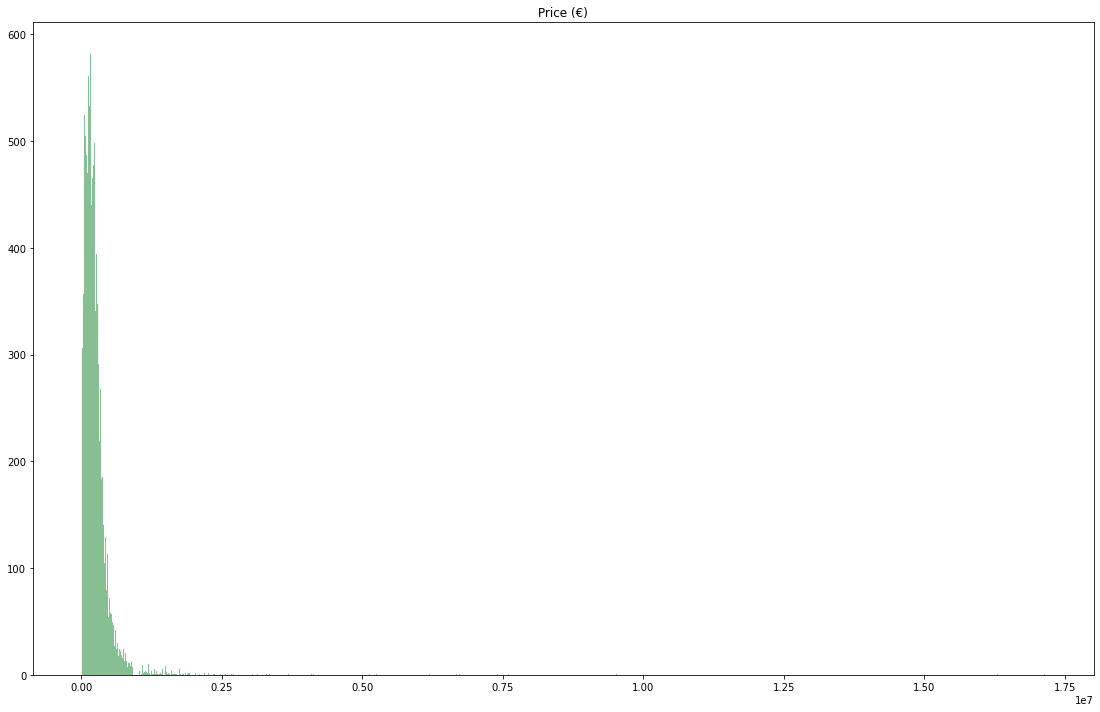

In [70]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)


In [71]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)


,Price (€)
4518,17151248.00
7913,16308370.05
7698,9515419.00
915,7600000.00
6404,7405286.34
3167,6720000.00
3999,6680000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00


The sale of property worth €17,151,248 and €16308370.05
has been dropped. As these is a large blocks of apartments. Thus, it does not makes sense to compare it to other sing dwellings. 

In [72]:
df[((df['Price (€)'] == 17151248.00))].index


Int64Index([4518], dtype='int64')

In [73]:
# All large blocks of apartments with no accurate way of braking up the dwellings and determining their individual prices
df = df.drop(index=7913)
df = df.drop(index=4518)
df = df.drop(index=7698)
df = df.drop(index=6404)
df = df.drop(index=3999)
df = df.drop(index=561)








In [74]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)


,Price (€)
915,7600000.00
3167,6720000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00
4438,5127753.00
2542,5000000.00
787,4138200.00
8462,3691629.96
242,3350000.00


The histogram of price looks like this with the outliers removed:

array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

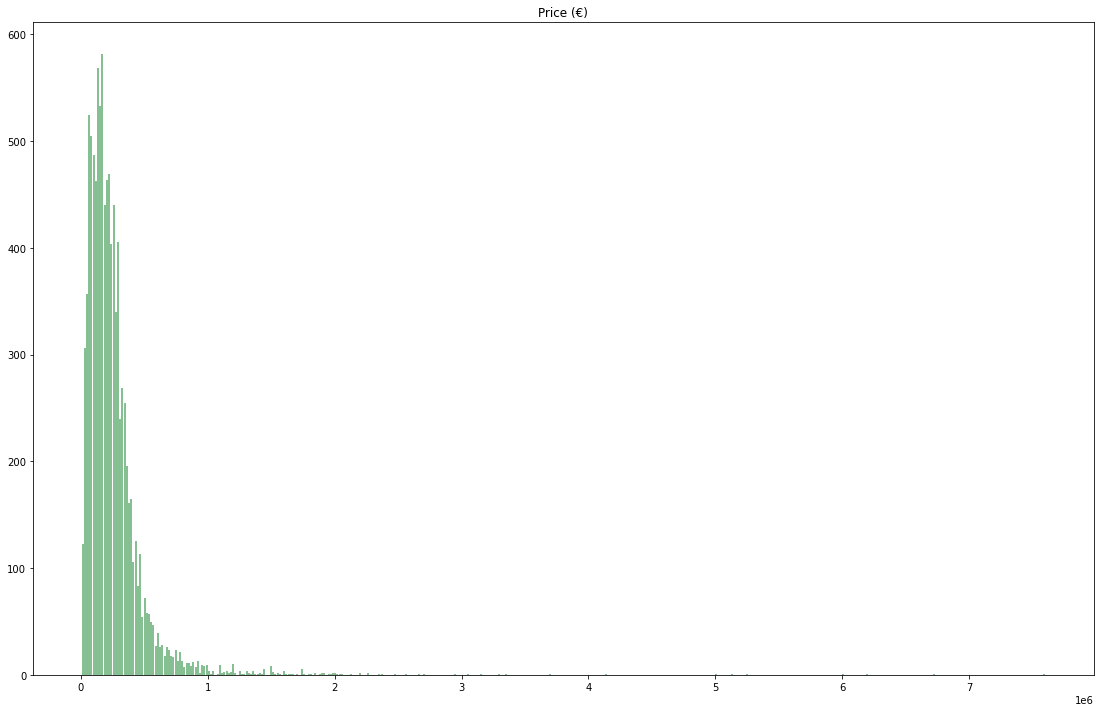

In [75]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)


#### Summary of data quality plan

| Variable Name | Data Quality Issue | Handling Stratergy |
| :- | :- | :- |
| Price (€) | Outliers | Remove high outliers, keep low outliers |
| Postal Code | Missing data |Do nothing|
| Description of Property | Descriptions were in Irish | Irish descriptions were tranlated so there were only two unique values for consistency |
| Propert Size Description | Missing data | feature was dropped as data was vague and the majority was missing |
| VAT exclusive | Provides varying info, with potentially not much meaning | Do nothing |


In [76]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),9994.0,254297.557243,280514.246613,5500.0,120000.0,200000.0,308370.0225,7600000.0


In [77]:
df[category_columns].describe().T

,count,unique,top,freq
Address,9994,9974,"MONUMENT RD, MENLO, GALWAY",2
Postal Code,1859,22,Dublin 15,232
County,9994,26,Dublin,3188
Not Full Market Price,9994,2,No,9546
VAT Exclusive,9994,2,No,8397
Description of Property,9994,2,Second-Hand Dwelling house /Apartment,8362
Property Size Description,1029,4,greater than or equal to 38 sq metres and less...,723


### Applying solutions to new csv file with the issues addressed:

In [78]:
df.to_csv('cleanedCSV_after_data_quality_plan-ppr-17350796.csv', index=False)

## Part 3: Exploring the relationships between feature pairs:

We want to be able to say something about the price data. 
The features that I will look at for pairwise interaction:

- County
- Year
- Month
- Description of property

The reasons for these choices, are these factors could all give insight and to provide markers into house prices. 

### County and Price bar char

- As you can see Dublin has the highest amount with Longford, Roscommon and Leitrim being the lowest

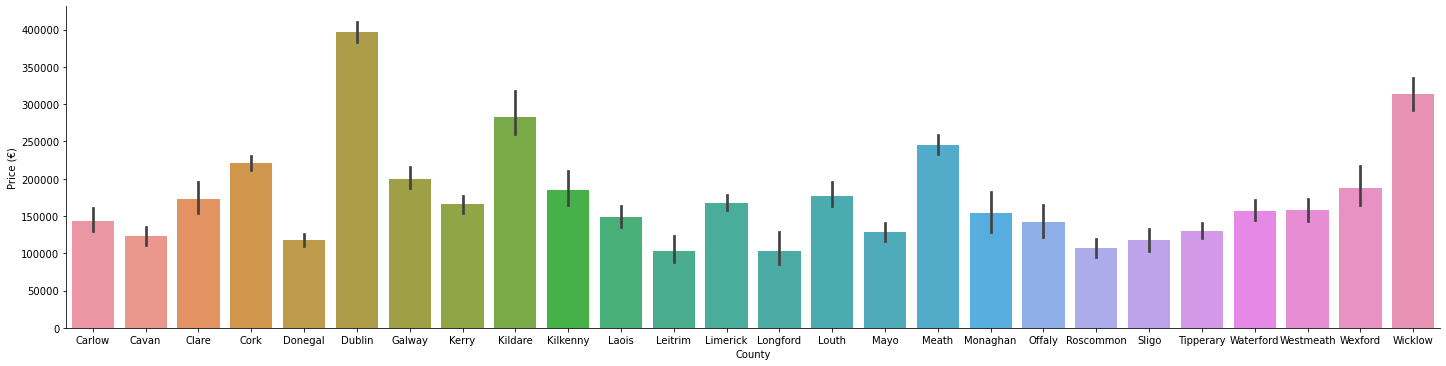

In [79]:
sns.catplot(x="County", y= "Price (€)", kind="bar",aspect=4,data=df)

### County and Price Box plot

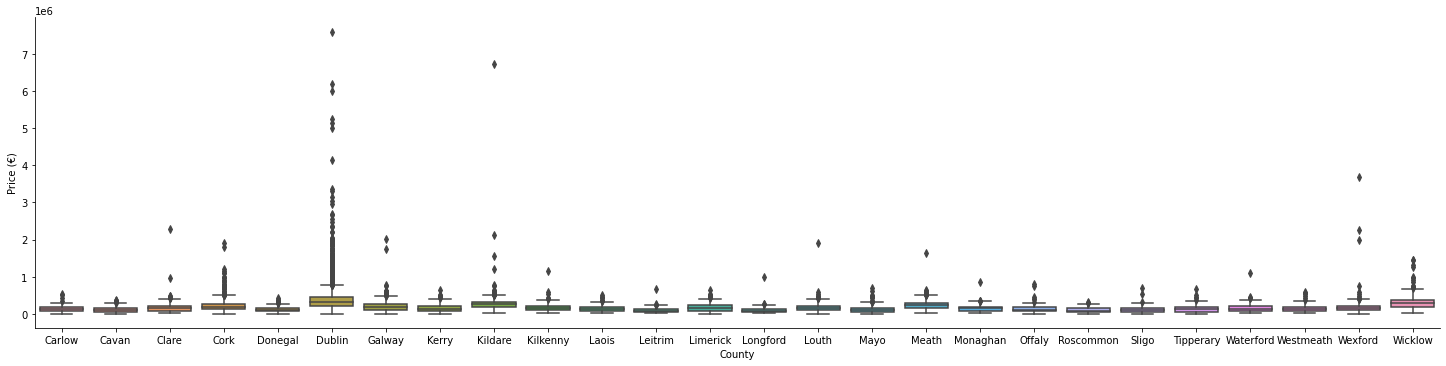

In [84]:
sns.catplot(x="County", y= "Price (€)", kind="box",aspect=4,data=df)

### Year and Price bar chart

- As you can see 2012 has the lowest with 2021 having the highest

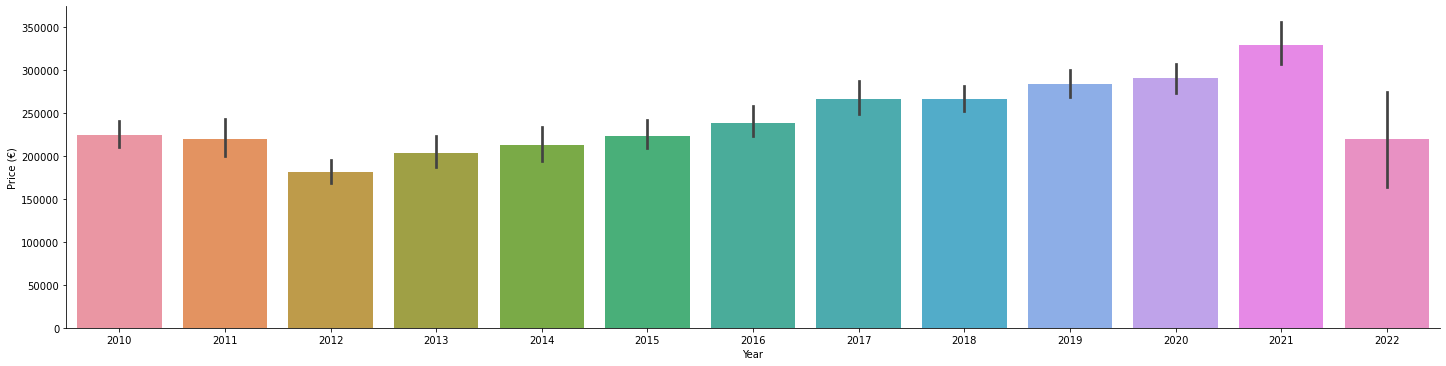

In [85]:
sns.catplot(x="Year", y= "Price (€)", kind="bar",aspect=4,data=df)

### Year and Price boxplot

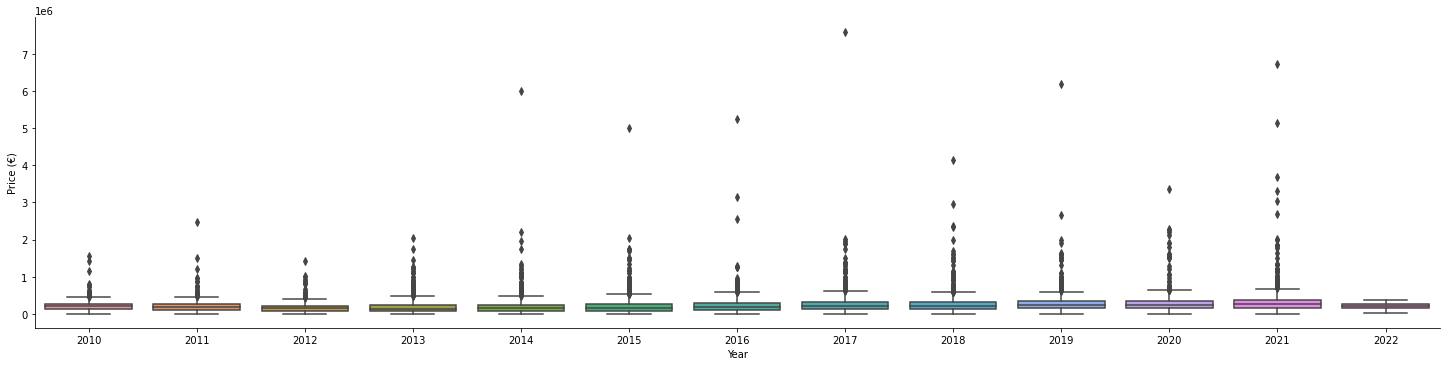

In [91]:
sns.catplot(x="Year", y= "Price (€)", kind="box",aspect=4,data=df)

### Month and Price bar plot

- As you can see for each month over the time price stays relatively consistent 

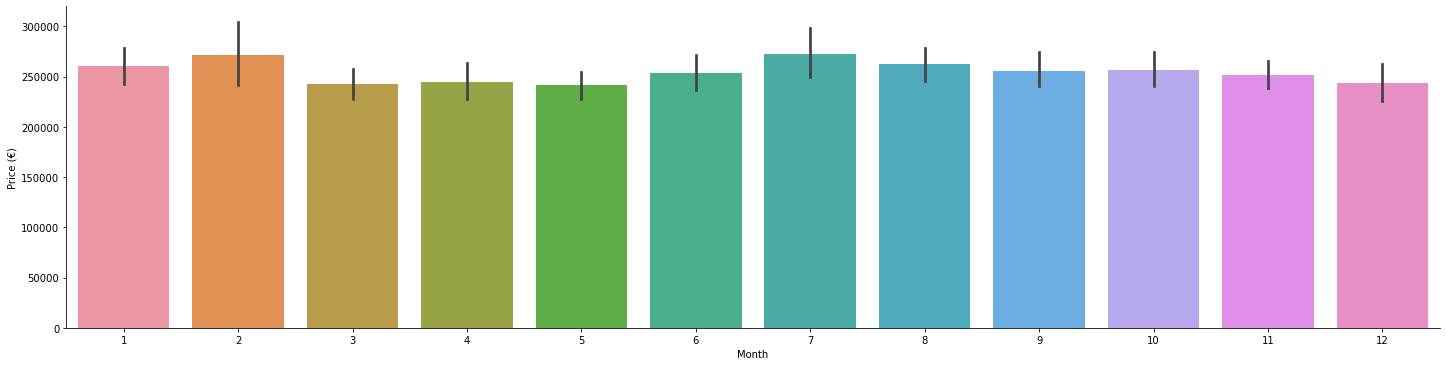

In [86]:
sns.catplot(x="Month", y= "Price (€)", kind="bar",aspect=4,data=df)

### Month and Price boxplot

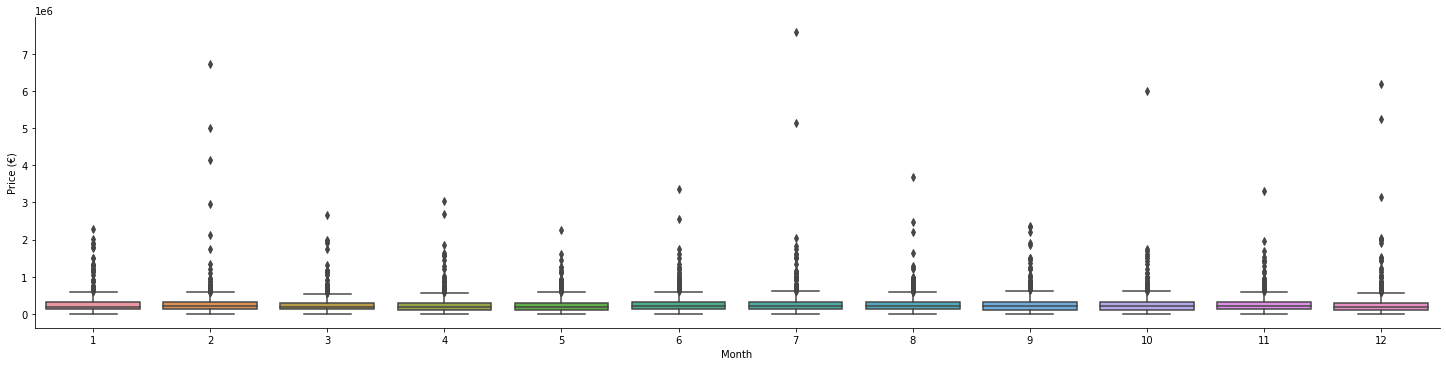

In [95]:
sns.catplot(x="Month", y= "Price (€)", kind="box",aspect=4,data=df)

### Decription of property and Price bar chart 

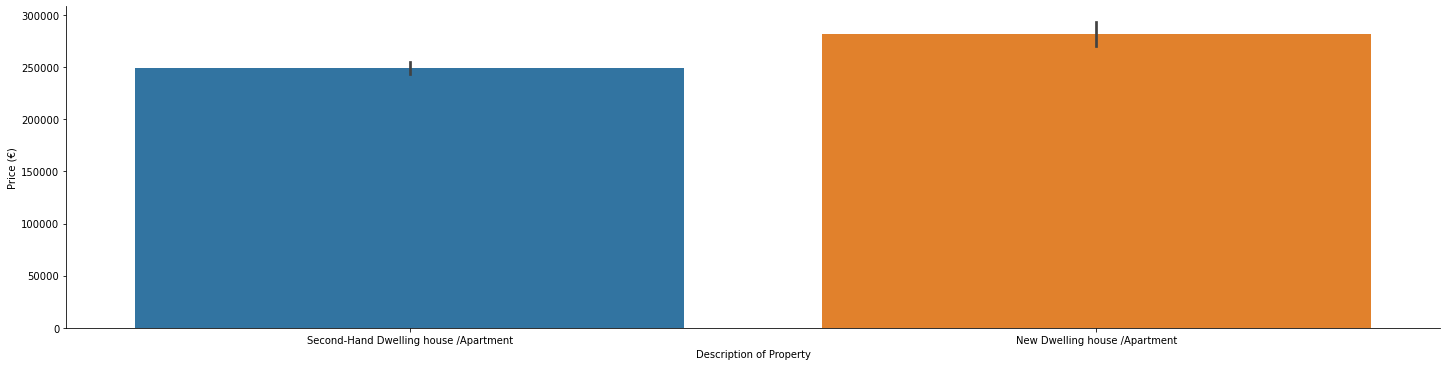

In [98]:
sns.catplot(x="Description of Property", y= "Price (€)", kind="bar",aspect=4,data=df)

### Postal Code and Price bar chart

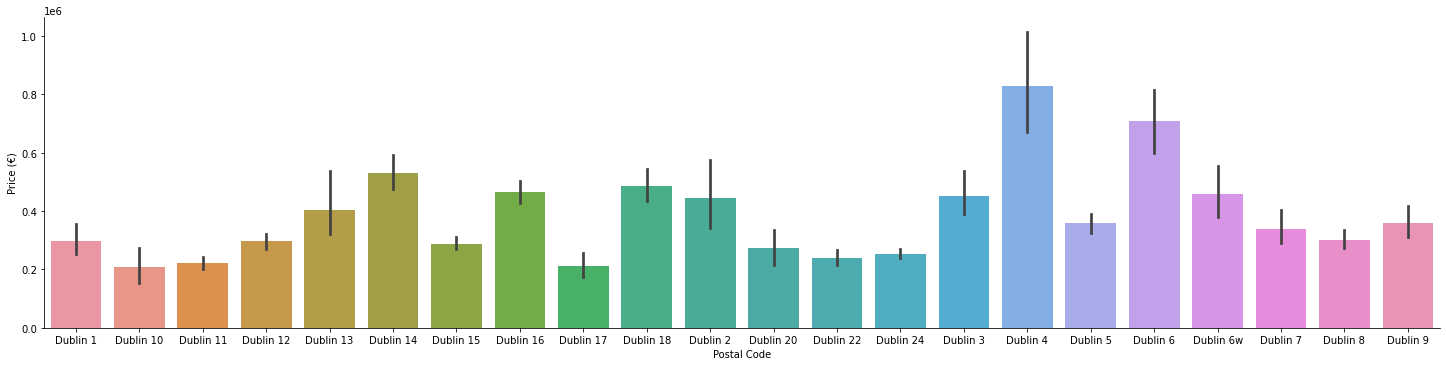

In [88]:
sns.catplot(x="Postal Code", y= "Price (€)", kind="bar",aspect=4,data=df)

### Postal Code and Price boxplot

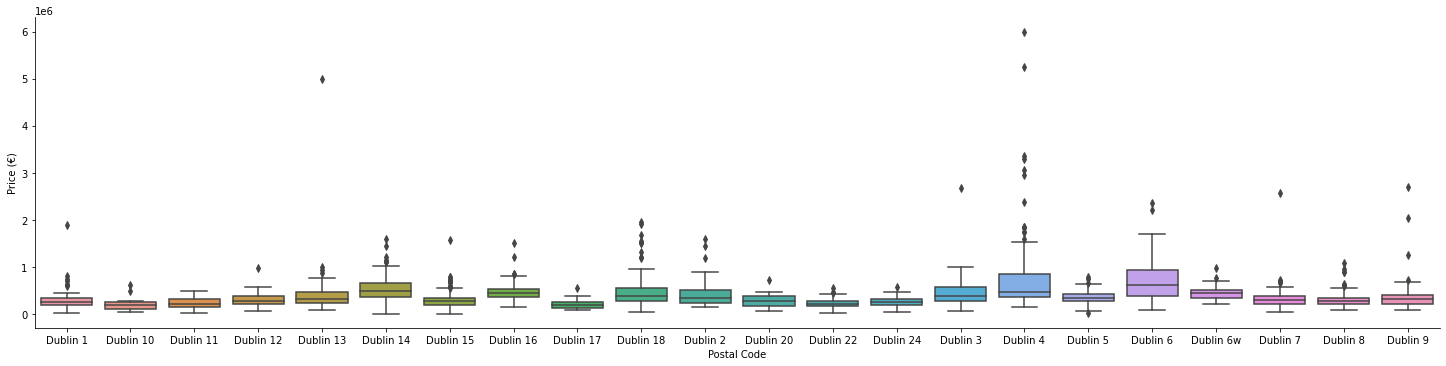

In [97]:
sns.catplot(x="Postal Code", y= "Price (€)", kind="box",aspect=4,data=df)

### Categorical vs Categorical feature plots

#### Comparing Description of Property and County

County
Index 	 Count
Dublin 	 3188
Kilkenny 	 133
Clare 	 240
Kerry 	 284
Tipperary 	 283
Wexford 	 363
Offaly 	 119
Longford 	 90
Waterford 	 245
Limerick 	 348
Wicklow 	 317
Meath 	 399
Galway 	 502
Donegal 	 274
Kildare 	 483
Roscommon 	 143
Cavan 	 153
Louth 	 288
Cork 	 1099
Mayo 	 259
Westmeath 	 174
Sligo 	 148
Laois 	 163
Carlow 	 124
Monaghan 	 76
Leitrim 	 99


(0.0, 100.0)

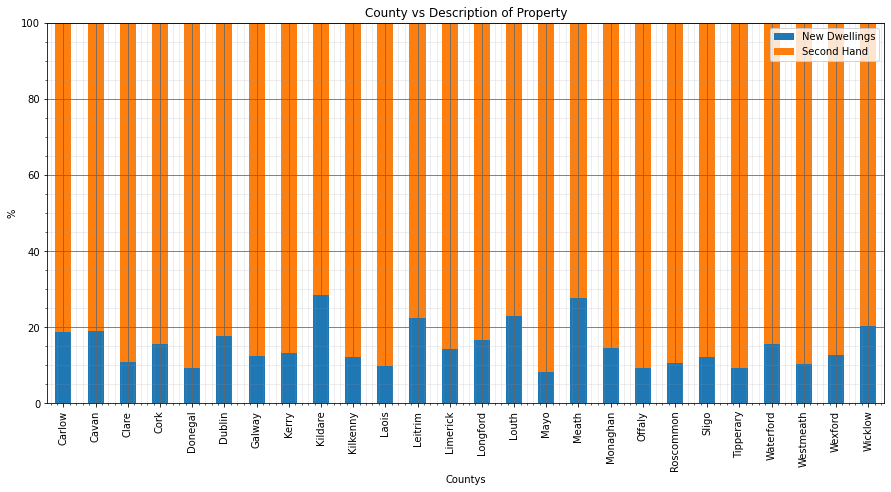

In [121]:
#Using code from the module lab
County = pd.unique(df["County"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("County")
print("Index \t Count")

# for each delinquency category
for i in County:
    
    count = df[df["County"] == i].count()['Description of Property']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['County'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','County','Description of Property']].groupby(['County','Description of Property']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="County vs Description of Property", figsize=(15,7), grid=True)


my_plot.legend(["New Dwellings", "Second Hand"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Countys")
my_plot.set_ylabel("%")
my_plot.set_ylim([0,100])

## Part 4: Creating New Features by transforming existing data or adding in external data

How the data frame looks currently: 

In [89]:
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Year,Month
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2016,6
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2014,12
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2020,5
3,2014-11-27,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2014,11
4,2018-11-22,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,2018,11
